# EDA


In [1]:
import pandas as pd
from langdetect import detect_langs
import matplotlib.pyplot as plt
import seaborn as sns
raw_data_dir= '../data/wrangled/'
raw_data_name ='wrangled_data.csv'

In [2]:
df = pd.read_csv(raw_data_dir+raw_data_name,index_col=0)

In [3]:
# Number of authors
df.author.nunique()

2844

In [4]:
# Statistics of how many poems from different authores there are
df.author.value_counts()[(df.author.value_counts()>1)].describe() 

count    1740.000000
mean        6.114943
std         5.734645
min         2.000000
25%         2.000000
50%         4.000000
75%         8.000000
max        70.000000
Name: author, dtype: float64

In [5]:
authors =  df.author.value_counts()[(df.author.value_counts()>1)]

In [6]:
author_list= ['Shakespeare',
 'Lord Tennyson',
 'W. Wordsworth',
 'J. Donne',
 'P. Sidney',
 'J. Ashbery',
 'A. Swinburne',
 'D. Young',
 'R. Browning',
 'W. Merwin',
 'T. Hardy',
 'E. Spenser',
 'Y. Komunyakaa',
 'W. Yeats',
 'W. Whitman',
 'H. Longfellow',
 'P. Shelley',
 'B. Collins',
 'E. Masters',
 'A. Notley',
 'John Keats',
 'M. Arnold',
 'E. barrett',
 'G. Herbert']

author_list= ['Shakespeare',
 'Tennyson',
 'Wordsworth',
 'Donne',
 'Sidney',
 'Ashbery',
 'Swinburne',
 'Young',
 'Browning',
 'Merwin',
 'Hardy',
 'Spenser',
 'Komunyakaa',
 'Yeats',
 'Whitman',
 'Longfellow',
 'Shelley',
 'Collins',
 'Masters',
 'Notley',
 'Keats',
 'Arnold',
 'Barrett',
 'Herbert']

In [7]:
data = authors.values[:24]
ser = pd.Series(data, index =author_list ) 

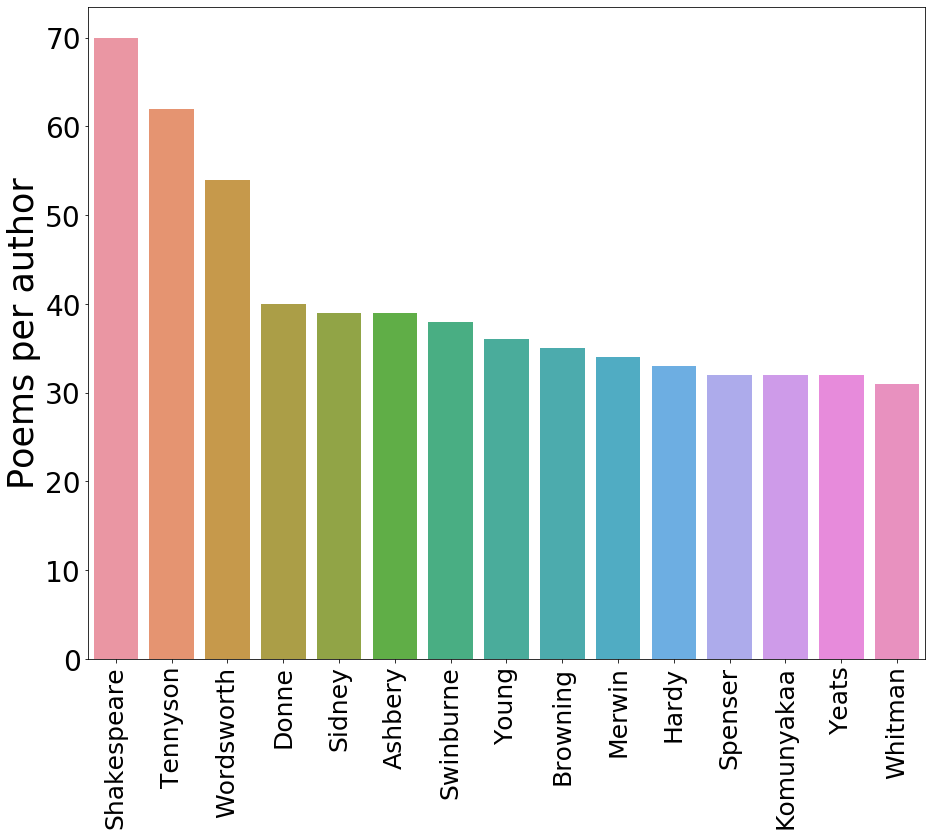

In [8]:
# Bar plot of poems per authors
FONTSIZE= 14
cols =ser[:15]
fig = plt.figure(figsize=(15,12))
ax = sns.barplot(cols.index, cols.values);
#ax.set_title('Poetry scrap from the poetry foundation', fontsize=25)
plt.ylabel('Poems per author', fontsize=35)
plt.xticks( rotation='vertical', fontsize=25);
plt.yticks( fontsize=28);
plt.show()
fig.savefig("../media/authors.png")

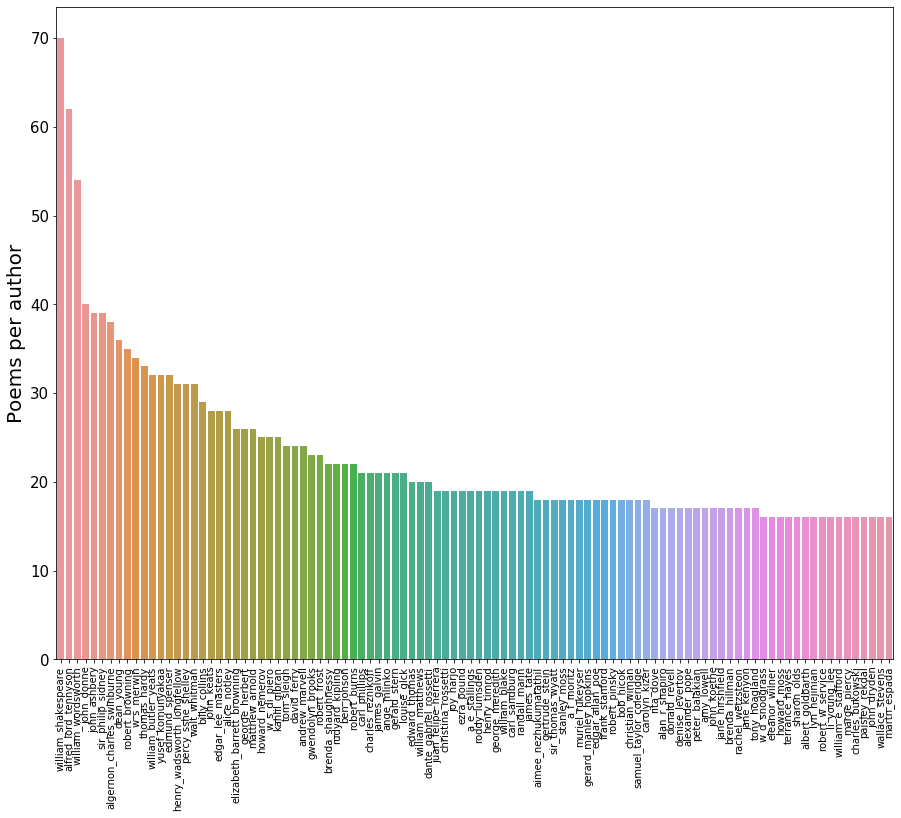

In [45]:
# Bar plot of poems per authors
FONTSIZE= 14
cols =authors[:100]
fig = plt.figure(figsize=(15,12))
ax = sns.barplot(cols.index, cols.values);
#ax.set_title('Poetry scrap from the poetry foundation', fontsize=25)
plt.ylabel('Poems per author', fontsize=20)
plt.xticks( rotation='vertical', fontsize=10);
plt.yticks( fontsize=15);
plt.show()
#fig.savefig("../media/authors.png")

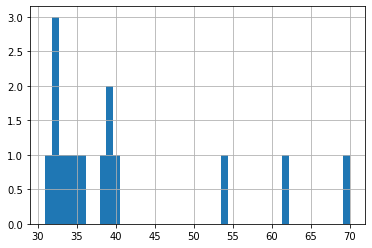

In [9]:
#histogram of number of poems per authors
cols.hist(bins=45)

**Insights:** 
- At least 80 authors have written have written more than 20 poems. 

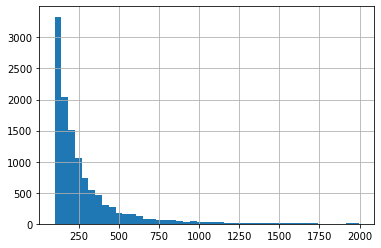

In [10]:
# Words lenght per poem cut above WORD_LIMIT
WORD_LIMIT= 2000
df.length_in_words[df.length_in_words <WORD_LIMIT].hist(bins=45)

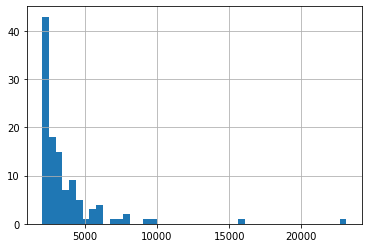

In [11]:
# Word lenght per poem cut below WORD_LIMIT
df.length_in_words[df.length_in_words >=WORD_LIMIT].hist(bins=45)

{'whiskers': [<matplotlib.lines.Line2D at 0x1a2420e588>,
 'caps': [<matplotlib.lines.Line2D at 0x1a2420ec18>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a2420e160>],
 'medians': [<matplotlib.lines.Line2D at 0x1a2420ef28>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a2421b630>],
 'means': []}

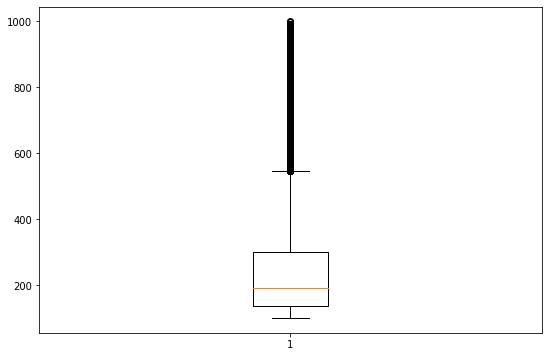

In [28]:
# Length of poems
fig = plt.figure(1, figsize=(9, 6))
lengths= df.length_in_words
plt.boxplot([lengths[lengths<1000]])
#fig.savefig('../plots_tables/catplots.png')

**Poem lenghts insight**

Most poems are shorter than a few hundred words. But some are as 20_000 words. 
Hence, it seems like we need to transform those poems into shorter versions.

In [29]:
from wordcloud import WordCloud

In [30]:
from nltk.corpus import stopwords
stopwords_en = stopwords.words('english')

def cloud_maker(text, background = 'white', withStopwords=True):
    
    if withStopwords == True: _stw = stopwords_en
    else: _stw = []
    wordcloud = WordCloud(background_color = background, 
                stopwords = _stw)
    wordcloud.generate(text)
    return wordcloud

In [34]:
txt_label = df.content.values
txt_label = ' '.join(txt_label)
cloud = cloud_maker(txt_label, background = 'white')

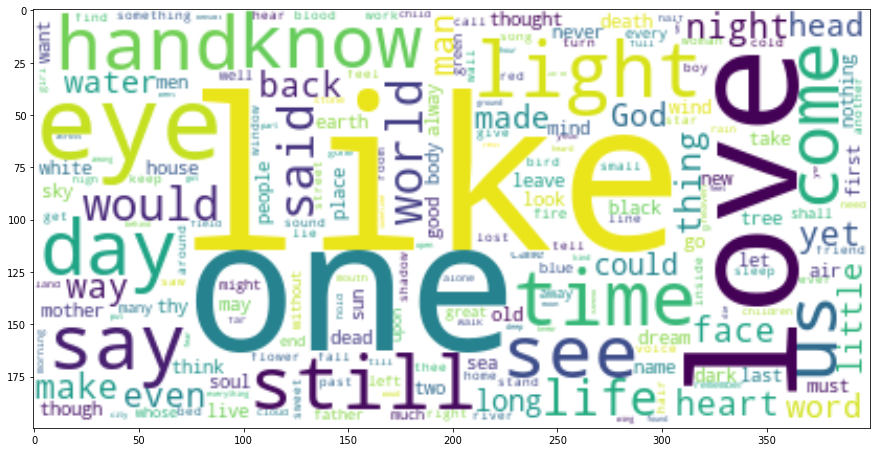

In [38]:
fig = plt.figure(1, figsize=(15, 12))
plt.imshow(cloud.recolor(random_state=1234), 
              interpolation = 'bilinear')

#    plt.gca().set_title(_labels[i],fontsize=15)
#    plt.axis("off")
#fig.savefig('../plots_tables/clouds.png')